# Tools - Pandas
*The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.*

Prerequisites:
* NumPy – if you are not familiar with NumPy, we recommend that you go through the [NumPy tutorial](tools_numpy.ipynb) now.

## Setup
First Let's Import `pandas` Most People Call it `pd`.

In [1]:
import pandas as pd

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

In [2]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [4]:
s + [1000, 2000, 3000, 4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is also called *broadcasting*:

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index Labels
Each Item in a `Series` object has a **Unique Identifier** Known as *Index Labels*, By Default it is Rank of the Item Which Starts from `0` but You can also Set Them Manually:

In [7]:
s2 = pd.Series([68, 83, 112, 68], index=["Praddyumn", "Lav", "Aman", "Aditya"])
s2

Praddyumn     68
Lav           83
Aman         112
Aditya        68
dtype: int64

You can also use `Series` Like a Python `dict`.

In [8]:
s2["Lav"]

83

You can still use inteager Location to get the Elements But Make Sure That it Starts from `0`.

In [9]:
s2[0]

68

To make it Clear to Other Developers and any Other Programm to Understand Weather You are Using `Inteager` Location or `Label` for accessing any Element You can Use `loc` while accessing through `Label` and You can You `iloc` while accessing Through `Inteager` Location.
- `loc` = Accessing Through Label
- `iloc` = Accession Through Inteager Location

In [10]:
s2.loc["Praddyumn"]

68

In [11]:
s2.iloc[0]

68

Slicing a `Series` also slices the index labels:

In [12]:
s2.iloc[1:3]

Lav      83
Aman    112
dtype: int64

This can lead to unexpected results when using the default numeric labels, so be careful:

In [13]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

Oh look! The first element has index label `2`. The element with index label `0` is absent from the slice:

In [15]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


But remember that you can access elements by integer location using the `iloc` attribute. This illustrates another reason why it's always better to use `loc` and `iloc` to access `Series` objects:

In [16]:
surprise_slice.iloc[0]

1002

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [17]:
weights = {"Praddyumn": 68, "Lav": 83, "Aman": 86, "Aditya": 68}
s3 = pd.Series(weights)
s3

Praddyumn    68
Lav          83
Aman         86
Aditya       68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [18]:
s4 = pd.Series(weights, index = ["Praddyumn", "Aman"])
s4

Praddyumn    68
Aman         86
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [19]:
print(s3.keys())
print(s4.keys())

s2 + s3

Index(['Praddyumn', 'Lav', 'Aman', 'Aditya'], dtype='object')
Index(['Praddyumn', 'Aman'], dtype='object')


Praddyumn    136
Lav          166
Aman         198
Aditya       136
dtype: int64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"Lav"` is missing from `s2` and `"Aditya"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [20]:
s5 = pd.Series([1000, 1000, 1000, 1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


0           NaN
1           NaN
2           NaN
3           NaN
Aditya      NaN
Aman        NaN
Lav         NaN
Praddyumn   NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [21]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [22]:
s6 = pd.Series([83, 68], index=["Aman", "Praddyumn"], name="weights")
s6

Aman         83
Praddyumn    68
Name: weights, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the **matplotlib tutorial** Which i Will be Working on in Future. Just import matplotlib and call the `plot()` method:

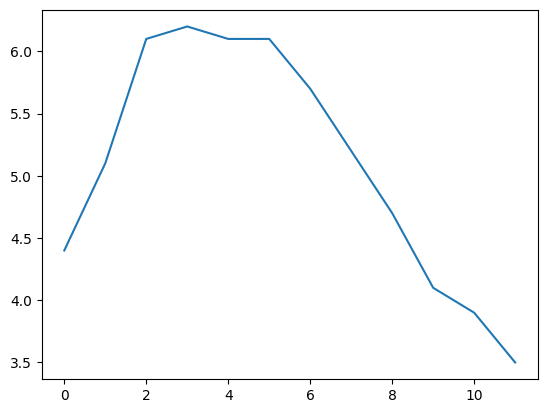

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

There are *many* options for plotting your data. It is not necessary to list them all here: if you need a particular type of plot (histograms, pie charts, etc.), just look for it in the excellent [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) section of pandas' documentation, and look at the example code.

# Handling time
Many datasets have timestamps, and pandas is awesome at manipulating such data:
* it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
* it can convert periods to actual timestamps, and *vice versa*,
* it can resample data and aggregate values any way you like,
* it can handle timezones.

## Time range
Let's start by creating a time series using `pd.date_range()`. This returns a `DatetimeIndex` containing one datetime per hour for 12 hours starting on October 29th 2016 at 5:30pm.

In [24]:
dates = pd.date_range("2016/10/29 5:30pm", periods=12, freq="H")
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

The `DateTimeIndex` can also be used as an `Index` in Pandas `Series`:

In [25]:
temp_series = pd.Series(temperatures, dates)
temp_series.head(n=10)

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
Freq: H, dtype: float64

Let's plot this `Series`:

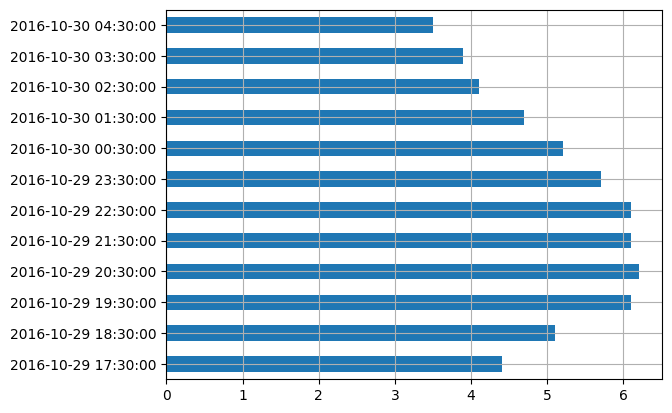

In [26]:
temp_series.plot(kind="barh")
plt.grid(True)
plt.show()

## Resampling
Pandas lets us resample a time series very simply. Just call the `resample()` method and specify a new frequency:

In [27]:
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

The resampling operation is actually a deferred operation, which is why we did not get a `Series` object, but a `DatetimeIndexResampler` object instead. To actually perform the resampling operation, we can simply call the `mean()` method: Pandas will compute the mean of every pair of consecutive hours:

In [28]:
temp_series_freq_2H = temp_series_freq_2H.mean()
temp_series_freq_2H

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64

Lets Plot the Result.

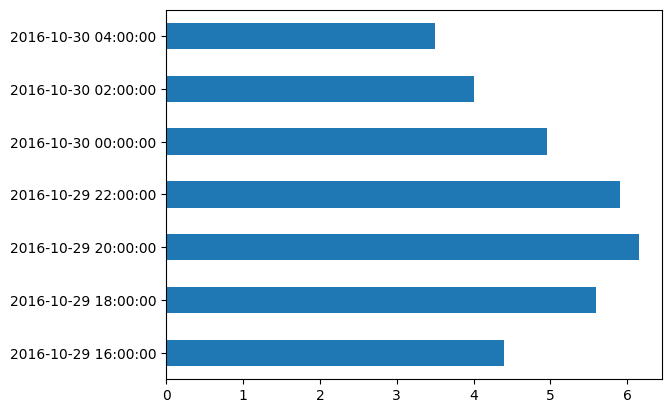

In [29]:
temp_series_freq_2H.plot(kind="barh")
plt.show()

Note how the values have automatically been aggregated into 2-hour periods. If we look at the 6-8pm period, for example, we had a value of `5.1` at 6:30pm, and `6.1` at 7:30pm. After resampling, we just have one value of `5.6`, which is the mean of `5.1` and `6.1`. Rather than computing the mean, we could have used any other aggregation function, for example we can decide to keep the minimum value of each period:

In [30]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

Or, equivalently, we could use the `apply()` method instead:

In [31]:
temp_series_freq_2H = temp_series.resample("2H").apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

## Upsampling and interpolation
This was an example of downsampling. We can also upsample (ie. increase the frequency), but this creates holes in our data:

In [32]:
temp_series_freq_15min = temp_series.resample("15min").mean()
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

One Solution is to fill the gaps by interpolating. We can just call `interpolate()` method. The default is to use Interpolation, but we can also select another methode, such as cubic interpolation:

In [33]:
temp_series_freq_15min = temp_series.resample("15min").interpolate(methode="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400
2016-10-29 17:45:00    4.575
2016-10-29 18:00:00    4.750
2016-10-29 18:15:00    4.925
2016-10-29 18:30:00    5.100
2016-10-29 18:45:00    5.350
2016-10-29 19:00:00    5.600
2016-10-29 19:15:00    5.850
2016-10-29 19:30:00    6.100
2016-10-29 19:45:00    6.125
Freq: 15T, dtype: float64

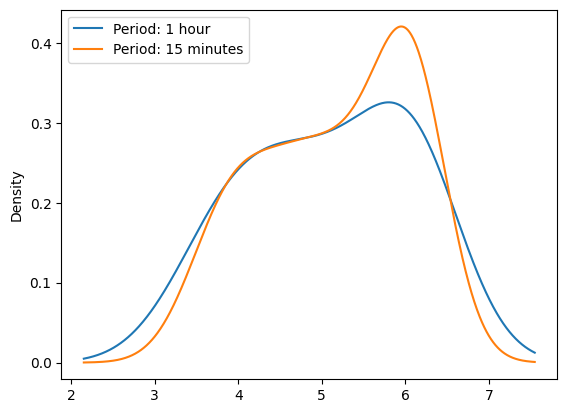

In [34]:
temp_series.plot(label="Period: 1 hour", kind="kde")
temp_series_freq_15min.plot(label="Period: 15 minutes", kind="kde")
plt.legend()
plt.show()

## Timezones
By default datetimes are *naive*: they are not aware of timezones, so 2016-10-30 02:30 might mean October 30th 2016 at 2:30am in Paris or in New York. We can make datetimes timezone *aware* by calling the `tz_localize()` method:

In [35]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

Note that `-04:00` is now appended to all the datetimes. This means that these datetimes refer to [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) - 4 hours.

We can convert these datetimes to Kolkata time like this:

In [36]:
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

You may have noticed that the UTC offset changes from `+02:00` to `+01:00`: this is because France switches to winter time at 3am that particular night (time goes back to 2am). Notice that 2:30am occurs twice! Let's go back to a naive representation (if you log some data hourly using local time, without storing the timezone, you might get something like this):

In [37]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
dtype: float64

Now `02:30` is really ambiguous. If we try to localize these naive datetimes to the Paris timezone, we get an error:

In [38]:
try:
    temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


Fortunately using the `ambiguous` argument we can tell pandas to infer the right DST (Daylight Saving Time) based on the order of the ambiguous timestamps:

In [39]:
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

## Periods
The `pd.period_range()` function returns a `PeriodIndex` instead of a `DatetimeIndex`. For example, let's get all quarters in 2016 and 2017:

In [40]:
quarters = pd.period_range("2016Q1", periods=8, freq="Q")
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

Adding a number `N` to a `PeriodIndex` shifts the periods by `N` times the `PeriodIndex`'s frequency:

In [41]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')

The `asfreq()` method lets us change the frequency of the `PeriodIndex`. All periods are lengthened or shortened accordingly. For example, let's convert all the quarterly periods to monthly periods (zooming in):

In [42]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]')

By Default `asfreq` zooms on end of each period. But we can tell it to Zoom at end of each Period Instead:

In [43]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]')

And We can Zoom Out:

In [44]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]')

Of Course We can Create a `Series` With `PeriodIndex`:

In [45]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

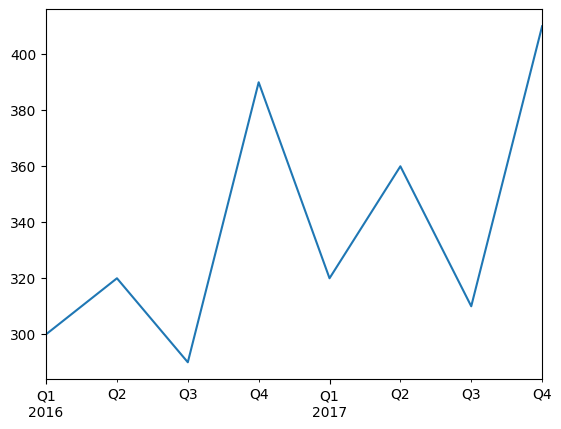

In [46]:
quarterly_revenue.plot(kind="line")
plt.show()

We can convert periods to timestamps by calling `to_timestamp`. By default this will give us the first day of each period, but by setting `how` and `freq`, we can get the last hour of each period:

In [47]:
last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
dtype: int64

And back to periods by calling `to_period`:

In [48]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). To whet your appetite, here is one way to get the last business day of each month in 2016, at 9am:

In [49]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]')

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [50]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["Aman", "Lav", "Praddyumn"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["Lav", "Aman", "Praddyumn"], name="year"),
    "children": pd.Series([0, 3], index=["Praddyumn", "Lav"]),
    "hobby": pd.Series(["Biking", "Dancing", "Coding"], index=["Aman", "Lav", "Praddyumn"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
Aman,68,1985,NaN,Biking
Lav,83,1984,3.0,Dancing
Praddyumn,112,1992,0.0,Coding


A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks and Visual Studio Code, woohoo!

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [51]:
people["birthyear"]

Aman         1985
Lav          1984
Praddyumn    1992
Name: birthyear, dtype: int64

You can also get Multiple Columns at Once:

In [52]:
people[["birthyear", "hobby"]]

,birthyear,hobby
Aman,1985,Biking
Lav,1984,Dancing
Praddyumn,1992,Coding


If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [53]:
d2 = pd.DataFrame(
    people_dict,
    columns=["birthyear", "weight", "height"],
    index=["Praddyumn", "Aman", "Lav"]
)
d2

,birthyear,weight,height
Praddyumn,1992,112,NaN
Aman,1985,68,NaN
Lav,1984,83,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [54]:
values = [
    [1985, np.nan, "Biking", 68],
    [1984, 3,      "Dancing", 83],
    [1992, 0,      np.nan, 112]
]
d3 = pd.DataFrame(
    values,
    columns=["birthyear", "children", "hobby", "weight"],
    index=["Aman", "Lav", "Praddyumn"]
)
d3

,birthyear,children,hobby,weight
Aman,1985,NaN,Biking,68
Lav,1984,3.0,Dancing,83
Praddyumn,1992,0.0,NaN,112


To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

In [55]:
masked_array = np.ma.asarray(values, dtype=object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["Aman", "Lav", "Praddyumn"]
)
d3

,birthyear,children,hobby,weight
Aman,1985,NaN,Biking,68
Lav,1984,3,Dancing,83
Praddyumn,1992,0,NaN,112


Instead of `ndarray` You can also pass a `DataFrame` Object.

In [56]:
d4 = pd.DataFrame(d3, columns=["hobby", "children"], index=["Aman", "Praddyumn"])
d4

,hobby,children
Aman,Biking,NaN
Praddyumn,NaN,0


It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [57]:
people = pd.DataFrame({
    "birthyear": {"Aman":1985, "Lav": 1984, "Praddyumn": 1992},
    "hobby": {"Aman":"Biking", "Lav": "Dancing"},
    "weight": {"Aman":68, "Lav": 83, "Praddyumn": 112},
    "children": {"Lav": 3, "Praddyumn": 0}
})
people

,birthyear,hobby,weight,children
Aman,1985,Biking,68,NaN
Lav,1984,Dancing,83,3.0
Praddyumn,1992,NaN,112,0.0


## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [58]:
d5 = pd.DataFrame(
    {
        ("public", "birthyear"): {
            ("Paris", "Aman"): 1985,
            ("Paris", "Lav"): 1984,
            ("London", "Praddyumn"): 1992,
        },
        ("public", "hobby"): {
            ("Paris", "Aman"): "Biking",
            ("Paris", "Lav"): "Dancing",
        },
        ("private", "weight"): {
            ("Paris", "Aman"): 68,
            ("Paris", "Lav"): 83,
            ("London", "Praddyumn"): 112,
        },
        ("private", "children"): {
            ("Paris", "Aman"): np.nan,
            ("Paris", "Lav"): 3,
            ("London", "Praddyumn"): 0,
        },
    }
)
d5

public          private         
                 birthyear    hobby  weight children
Paris  Aman           1985   Biking      68      NaN
       Lav            1984  Dancing      83      3.0
London Praddyumn      1992      NaN     112      0.0

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [59]:
d5["public"]

birthyear    hobby
Paris  Aman            1985   Biking
       Lav             1984  Dancing
London Praddyumn       1992      NaN

In [60]:
d5["private"]

weight  children
Paris  Aman           68       NaN
       Lav            83       3.0
London Praddyumn     112       0.0

In [61]:
d5["public", "hobby"]  # Same result as d5["public"]["hobby"]

Paris   Aman          Biking
        Lav          Dancing
London  Praddyumn        NaN
Name: (public, hobby), dtype: object

## Dropping a level
Let's look at `d5` again:

In [62]:
d5

public          private         
                 birthyear    hobby  weight children
Paris  Aman           1985   Biking      68      NaN
       Lav            1984  Dancing      83      3.0
London Praddyumn      1992      NaN     112      0.0

There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel()` (the same goes for indices):

In [63]:
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  Aman            1985   Biking      68       NaN
       Lav             1984  Dancing      83       3.0
London Praddyumn       1992      NaN     112       0.0

## Transposing
You can Swap(Transpose) columns and Indices Using `T` Attribute:

In [64]:
d6 = d5.T
d6

Paris             London
             Aman      Lav Praddyumn
birthyear    1985     1984      1992
hobby      Biking  Dancing       NaN
weight         68       83       112
children      NaN      3.0       0.0

## Stacking and unstacking levels
Calling the `stack()` method will push the lowest column level after the lowest index:

In [65]:
d7 = d6.stack()
d7

London    Paris
birthyear Aman         NaN     1985
          Lav          NaN     1984
          Praddyumn   1992      NaN
hobby     Aman         NaN   Biking
          Lav          NaN  Dancing
weight    Aman         NaN       68
          Lav          NaN       83
          Praddyumn    112      NaN
children  Lav          NaN      3.0
          Praddyumn    0.0      NaN

Note that many `NaN` values appeared. This makes sense because many new combinations did not exist before (eg. there was no `Lav` in `London`).

Calling `unstack()` will do the reverse, once again creating many `NaN` values.

In [66]:
d8 = d7.unstack()
d8

London                  Paris                   
            Aman  Lav Praddyumn    Aman      Lav Praddyumn
birthyear    NaN  NaN      1992    1985     1984       NaN
children     NaN  NaN       0.0     NaN      3.0       NaN
hobby        NaN  NaN       NaN  Biking  Dancing       NaN
weight       NaN  NaN       112      68       83       NaN

If We call `unstack` again we will end up with a `Series` object:

In [67]:
d9 = d8.unstack()
d9

London  Aman       birthyear        NaN
                   children         NaN
                   hobby            NaN
                   weight           NaN
        Lav        birthyear        NaN
                   children         NaN
                   hobby            NaN
                   weight           NaN
        Praddyumn  birthyear       1992
                   children         0.0
                   hobby            NaN
                   weight           112
Paris   Aman       birthyear       1985
                   children         NaN
                   hobby         Biking
                   weight            68
        Lav        birthyear       1984
                   children         3.0
                   hobby        Dancing
                   weight            83
        Praddyumn  birthyear        NaN
                   children         NaN
                   hobby            NaN
                   weight           NaN
dtype: object

The `stack()` and `unstack()` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:

In [68]:
d10 = d9.unstack(level = (0,1))
d10

London                  Paris                   
            Aman  Lav Praddyumn    Aman      Lav Praddyumn
birthyear    NaN  NaN      1992    1985     1984       NaN
children     NaN  NaN       0.0     NaN      3.0       NaN
hobby        NaN  NaN       NaN  Biking  Dancing       NaN
weight       NaN  NaN       112      68       83       NaN

## Most methods return modified copies
As you may have noticed, the `stack()` and `unstack()` methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

## Accessing rows
Let's go back to the `people` `DataFrame`:

In [69]:
people

,birthyear,hobby,weight,children
Aman,1985,Biking,68,NaN
Lav,1984,Dancing,83,3.0
Praddyumn,1992,NaN,112,0.0


The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [70]:
people.loc["Praddyumn"]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: Praddyumn, dtype: object

You can Also use the `iloc` attribute to access the rows using an `inteager`.

In [71]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: Praddyumn, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [72]:
people.iloc[1:3]

,birthyear,hobby,weight,children
Lav,1984,Dancing,83,3.0
Praddyumn,1992,NaN,112,0.0


Finally, you can pass a boolean array to get the matching rows:

In [73]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
Aman,1985,Biking,68,NaN
Praddyumn,1992,NaN,112,0.0


This is most useful when combined with boolean expressions:

In [74]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
Aman,1985,Biking,68,NaN
Lav,1984,Dancing,83,3.0


## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [75]:
people

,birthyear,hobby,weight,children
Aman,1985,Biking,68,NaN
Lav,1984,Dancing,83,3.0
Praddyumn,1992,NaN,112,0.0


In [76]:
people["age"] = 2022 - people["birthyear"]
people["over 30"] = people["age"] > 30
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
Aman,Biking,68,37,True
Lav,Dancing,83,38,True
Praddyumn,NaN,112,30,False


In [77]:
birthyears

Aman         1985
Lav          1984
Praddyumn    1992
Name: birthyear, dtype: int64

When You are Creating a New Column then, it must have same number of rows Missing Rows are Filled with `NaN` and extra Rows are Ignored.

In [78]:
people["pets"] = pd.Series({"Lav": 0, "Praddyumn": 5, "Nitendra": 1}) # Aman is Missing and Nitendra is Ignored
people

,hobby,weight,age,over 30,pets
Aman,Biking,68,37,True,NaN
Lav,Dancing,83,38,True,0.0
Praddyumn,NaN,112,30,False,5.0


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [79]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
Aman,Biking,172,68,37,True,NaN
Lav,Dancing,181,83,38,True,0.0
Praddyumn,NaN,185,112,30,False,5.0


## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [80]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
Aman,Biking,172,68,37,True,NaN,22.985398,False
Lav,Dancing,181,83,38,True,0.0,25.335002,False
Praddyumn,NaN,185,112,30,False,5.0,32.724617,True


Note that you cannot access columns created within the same assignment:

In [81]:
try:
    people.assign(
        body_mass_index=people["weight"] / (people["height"] / 100) ** 2,
        overweight=people["body_mass_index"] > 25,
    )
except KeyError as e:
    print(f"Key Error: {e}")

Key Error: 'body_mass_index'


The solution is to split this assignment in two consecutive assignments:

In [82]:
d6 = people.assign(body_mass_index = people["weight"] / (people["height"] / 100) ** 2)
d6.assign(overweight = d6["body_mass_index"] > 25)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
Aman,Biking,172,68,37,True,NaN,22.985398,False
Lav,Dancing,181,83,38,True,0.0,25.335002,True
Praddyumn,NaN,185,112,30,False,5.0,32.724617,True


Having to create a temporary variable `d6` is not very convenient. You may want to just chain the assigment calls, but it does not work because the `people` object is not actually modified by the first assignment:

In [83]:
try:
    (
        people.assign(
            body_mass_index=people["weight"] / (people["height"] / 100) ** 2
        ).assign(overweight=people["body_mass_index"] > 25)
    )
except KeyError as e:
    print("Key error:", e)


Key error: 'body_mass_index'


But fear not, there is a simple solution. You can pass a function to the `assign()` method (typically a `lambda` function), and this function will be called with the `DataFrame` as a parameter:

In [84]:
(
    people.assign(
        body_mass_index=lambda df: df["weight"] / (df["height"] / 100) ** 2
    ).assign(overweight=lambda df: df["body_mass_index"] > 25)
)


,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
Aman,Biking,172,68,37,True,NaN,22.985398,False
Lav,Dancing,181,83,38,True,0.0,25.335002,True
Praddyumn,NaN,185,112,30,False,5.0,32.724617,True


## Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [85]:
people.eval("weight / (height/100) ** 2 > 25")

Aman         False
Lav           True
Praddyumn     True
dtype: bool

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [86]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
Aman,Biking,172,68,37,True,NaN,22.985398
Lav,Dancing,181,83,38,True,0.0,25.335002
Praddyumn,NaN,185,112,30,False,5.0,32.724617


You can use a local or global variable in an expression by prefixing it with `'@'`:

In [87]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
Aman,Biking,172,68,37,True,NaN,22.985398,False
Lav,Dancing,181,83,38,True,0.0,25.335002,False
Praddyumn,NaN,185,112,30,False,5.0,32.724617,True


## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [88]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
Lav,Dancing,181,83,38,True,0.0,25.335002,False
